# Задачи од пребарување

## Претурање вода во садови

Имате на располагање 3 садови. Нивниот капацитет е 5, 8 и 10 соодветно.  На почетокот сите садови се празни. Задачата е да претурите 1 литар во садот од 5 литри. Можете да претурате вода меѓу садовите, но не знаете точно колку претурате бидејќи садовите не се обележани. Единствено може да го испразните садот од кој претурате или да го наполните до врв садот во кој претурате. Постои и чешма од која може да надополните некој сад до врвот. Секогаш може да ја истурите водата од некој сад. Скратено: имате на располагање 3 садови. Нивниот капацитет е (x, y, z) соодветно. Почетната состојба е (x_0, y_0, z_0). Задачата е да стигнете до посакуваната состојба.

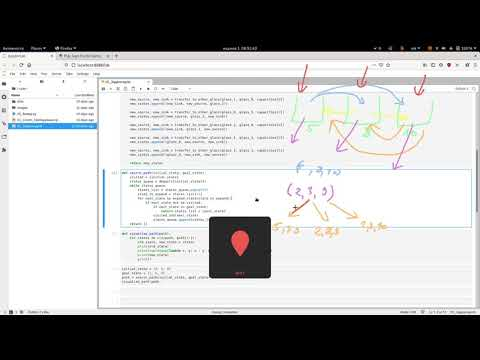

In [10]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('OaJrwr4laPU')

In [10]:
from collections import deque

In [11]:
def transfer_to_other_glass(source, sink, sink_capacity):
    return max(source - (sink_capacity - sink), 0), min(sink + source, sink_capacity)

In [12]:
def expand_state(state):
    capacities = (5, 8, 10)
    glass_0, glass_1, glass_2 = state

    new_states = []

    if glass_0 < capacities[0]:
        new_states.append((capacities[0], glass_1, glass_2))
    if glass_1 < capacities[1]:
        new_states.append((glass_0, capacities[1], glass_2))
    if glass_2 < capacities[2]:
        new_states.append((glass_0, glass_1, capacities[2]))
    
    if glass_0 > 0:
        new_states.append((0, glass_1, glass_2))
    if glass_1 > 0:
        new_states.append((glass_0, 0, glass_2))
    if glass_2 > 0:
        new_states.append((glass_0, glass_1, 0))

    new_source, new_sink = transfer_to_other_glass(glass_0, glass_1, capacities[1])
    new_states.append((new_source, new_sink, glass_2))

    new_source, new_sink = transfer_to_other_glass(glass_1, glass_0, capacities[0])
    new_states.append((new_sink, new_source, glass_2))

    new_source, new_sink = transfer_to_other_glass(glass_0, glass_2, capacities[2])
    new_states.append((new_source, glass_1, new_sink))

    new_source, new_sink = transfer_to_other_glass(glass_2, glass_0, capacities[0])
    new_states.append((new_sink, glass_1, new_source))

    new_source, new_sink = transfer_to_other_glass(glass_1, glass_2, capacities[2])
    new_states.append((glass_0, new_source, new_sink))

    new_source, new_sink = transfer_to_other_glass(glass_2, glass_1, capacities[1])
    new_states.append((glass_0, new_sink, new_source))
    
    return new_states

In [18]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [19]:
def visualise_path(path):
    for states in zip(path, path[1:]):
        old_state, new_state = states
        print(old_state)
        print(tuple(map(lambda x, y: x - y, new_state, old_state)), 'change')
        print(new_state)
        print()

In [21]:
initial_state = (0, 0, 0)
goal_states = (1, 0, 0)
path = search_path(initial_state, goal_state)
visualise_path(path)

(0, 0, 0)
(0, 8, 0) change
(0, 8, 0)

(0, 8, 0)
(5, -5, 0) change
(5, 3, 0)

(5, 3, 0)
(-5, 0, 0) change
(0, 3, 0)

(0, 3, 0)
(3, -3, 0) change
(3, 0, 0)

(3, 0, 0)
(0, 8, 0) change
(3, 8, 0)

(3, 8, 0)
(0, -8, 8) change
(3, 0, 8)

(3, 0, 8)
(-2, 0, 2) change
(1, 0, 10)

(1, 0, 10)
(0, 0, -10) change
(1, 0, 0)



## Поставување кралици на шаховска табла

РаспоредетеПоставене N кралици на NxN шаховска табла така што кралиците нема да се напаѓаат.

In [11]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('pf1rTaEibgI')

In [11]:
# извршете ја оваа наредба за да ги симнете библиотеките за исцртување на таблата
!conda install -c conda-forge -y numpy scikit-image

Solving environment: done

# All requested packages already installed.



In [1]:
from collections import deque
import os

In [2]:
def is_valid(new_state, new_queen_i, new_queen_j):
    vertical_check = new_queen_j not in new_state
    if not vertical_check:
        return False
    main_diagonal = new_queen_i - new_queen_j
    anti_diagonal = new_queen_i + new_queen_j
    other_queens = new_state[:N - new_state.count(None)]
    for other_queen_i, other_queen_j in enumerate(other_queens):
        if other_queen_i - other_queen_j == main_diagonal:
            return False
        if other_queen_i + other_queen_j == anti_diagonal:
            return False
    return True

In [3]:
def expand_state(state):
    new_states = []
    available_places = state.count(None)
    if not available_places:
        return []
    new_queen_i = N - available_places
    for new_queen_j in range(N):
        if is_valid(state, new_queen_i, new_queen_j):
            new_state = list(state)
            new_state[new_queen_i] = new_queen_j
            new_states.append(tuple(new_state))
    return new_states

In [4]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state.count(None) == 0:
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)
    return

In [5]:
def visualise_queens(queens):
    import numpy as np
    import skimage
    from skimage import io
    
    if not queens:
        print('Не постои реше.astype(np.uint8)ние за N =', N)
        return
    border_color = (0, 0, 0, 1)
    queen = skimage.img_as_float(io.imread('images/queen.png'))
    table = np.zeros((queen.shape[0] * N, queen.shape[1] * N, queen.shape[2]))
    margin = queen.shape[0] // 20
    for i, j in enumerate(queens):
        table[i*queen.shape[0]:(i+1)*queen.shape[0], j*queen.shape[1]:(j+1)*queen.shape[1]] = queen
    for index in range(1, N):
        table[index * queen.shape[0] - margin: index * queen.shape[0] + margin] = border_color
        table[:, index * queen.shape[1] - margin: index * queen.shape[1] + margin] = border_color
    image_directory = 'queens'
    os.makedirs(f'images/{image_directory}', exist_ok=True)
    io.imsave(f'images/{image_directory}/{N}.png', 255*table.astype(np.uint8))
    return f'Погледни ја сликата images/{image_directory}/{N}.png'

In [6]:
N = 8
initial_state = (None,) * N
queens = search(initial_state, alg='dfs')
queens

(7, 3, 0, 2, 5, 1, 6, 4)

In [7]:
visualise_queens(queens)

'Погледни ја сликата images/queens/8.png'

In [8]:
%%time

N = 12
initial_state = (None,) * N
queens = search(initial_state, alg='dfs')
queens

CPU times: user 5.53 ms, sys: 889 µs, total: 6.42 ms
Wall time: 6.3 ms


In [9]:
%%time

N = 12
initial_state = (None,) * N
queens = search(initial_state, alg='bfs')
queens

CPU times: user 6.3 s, sys: 58.2 ms, total: 6.36 s
Wall time: 6.37 s


## Задачи за самостојно решавање

1. Користејќи ја шаховската фигура коњ, најдете ја најкратката патека од едно до друго поле на шаховската табла.
2. Од папката exercises ќе најдете задача за самостојна работа каде треба да го најдете најмалиот број преминувања преку реката за околу 17 групи. Нормално, не мора да ги решавате сите 17, но одберете си некоја задача.